In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from re import sub
from decimal import Decimal
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter

In [3]:
data = pd.read_csv("movies_01.csv")

In [4]:
data["released_date"]

0      08/13/2021 (US)
1      10/01/2021 (US)
2      07/23/2021 (US)
3      08/04/2020 (US)
4      03/12/2021 (US)
            ...       
575    11/12/2020 (MX)
576    06/17/2010 (US)
577    05/05/2019 (JP)
578    05/19/2007 (US)
579    10/12/2012 (US)
Name: released_date, Length: 580, dtype: object

In [5]:
# cắt chuỗi date
data["released_date"] = data["released_date"].str[:10]

# thêm 1 cột là tháng
data["released_month"] = data["released_date"].str[0:2]

# thêm 1 cột là năm
data["released_year"] = data["released_date"].str[6:10]

<AxesSubplot:xlabel='released_month'>

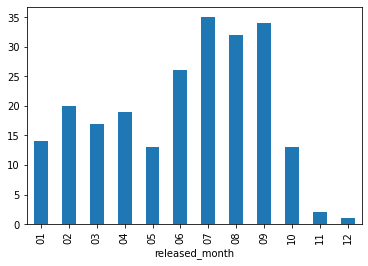

In [6]:
# mặt nạ lọc ra những phim có năm xuất bản 2021
movies_of_2021_mask = data["released_year"] == "2021"

# những phim có năm xuất bản 2021
movies_of_2021 = data[movies_of_2021_mask]

# nhóm lại theo tháng
# Biểu đồ biểu diễn số lượng phim ra mắt trong các tháng của nam9 2021
movies_of_2021.groupby(["released_month"]).size().plot(kind="bar")

# KL: 

/var/folders/fc/_b6510nd3jn75fl587mvst180000gp/T/ipykernel_34180/1771760389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_not_nil_movies["investment"] = money_not_nil_movies["investment"].replace("[\$,)]","", regex=True).astype(float).astype(int)
/var/folders/fc/_b6510nd3jn75fl587mvst180000gp/T/ipykernel_34180/1771760389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_not_nil_movies["revenue"] = money_not_nil_movies["revenue"].replace("[\$,)]","", regex=True).astype(float).astype(int)

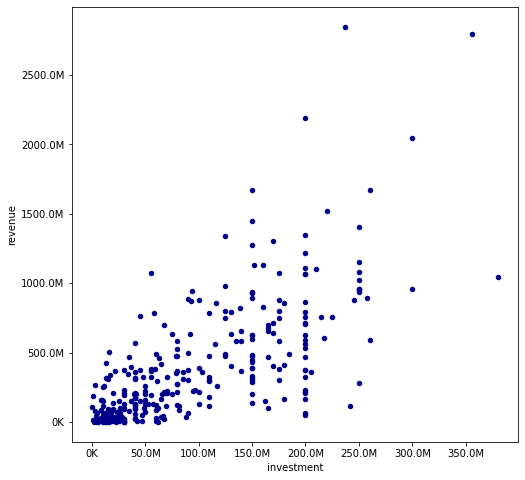

In [7]:
# mặt nạ lọc ra những phim có đầu tư và thu nhập ko rỗng
investment_not_nil_mask = data["investment"] != "-"
investment_not_nil_movies = data[investment_not_nil_mask]
revenue_not_nil_mask = investment_not_nil_movies["revenue"] != "-"

money_not_nil_movies = investment_not_nil_movies[revenue_not_nil_mask]

# money_not_nil_movies["investment"].to_numeric()
money_not_nil_movies["investment"] = money_not_nil_movies["investment"].replace("[\$,)]","", regex=True).astype(float).astype(int)
money_not_nil_movies["revenue"] = money_not_nil_movies["revenue"].replace("[\$,)]","", regex=True).astype(float).astype(int)

ax = money_not_nil_movies.plot.scatter(
    x="investment", 
    y="revenue",
    c="DarkBlue", 
    figsize=(8, 8)
)

ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_major_formatter(format_number)

<AxesSubplot:xlabel='comments', ylabel='rating'>

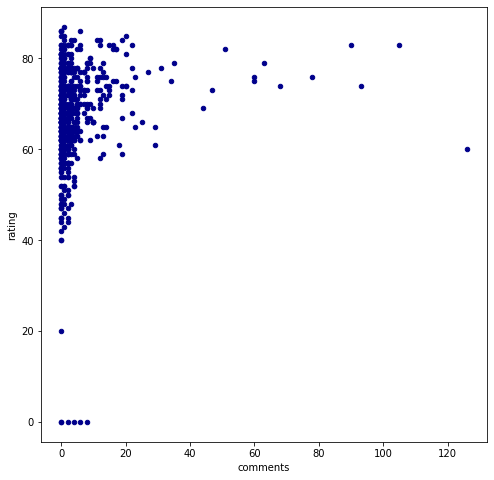

In [8]:
data.plot.scatter(
    x="comments", 
    y="rating",
    c="DarkBlue", 
    figsize=(8, 8)
)

/var/folders/fc/_b6510nd3jn75fl587mvst180000gp/T/ipykernel_34180/2962833309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_not_nil_movies["investment"] = investment_not_nil_movies["investment"].replace("[\$,)]","", regex=True).astype(float).astype(int)


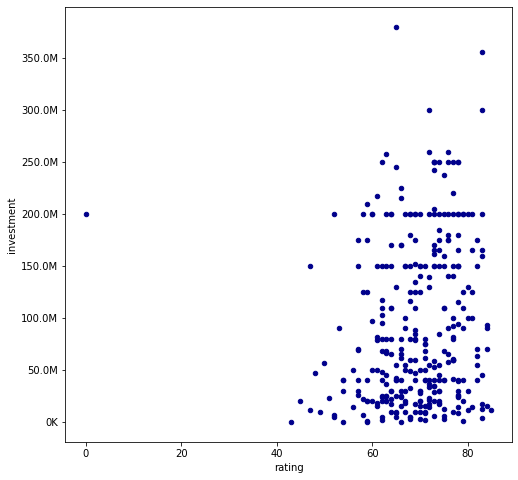

In [11]:
# mat na lọc ra những record có vốn ko phải rỗng
investment_not_nil_mask = data["investment"] != "-"
# filter
investment_not_nil_movies = data[investment_not_nil_mask]
# chuyển giá trị chuỗi $ thành dạng int
investment_not_nil_movies["investment"] = investment_not_nil_movies["investment"].replace("[\$,)]","", regex=True).astype(float).astype(int)

 
# biểu đồ quan hệ: tiền đầu tư - rating
ax = investment_not_nil_movies.plot.scatter(
    x="rating",
    y="investment",
    c="DarkBlue",
    figsize=(8, 8)
)

ax.yaxis.set_major_formatter(format_number)


<AxesSubplot:ylabel='language'>

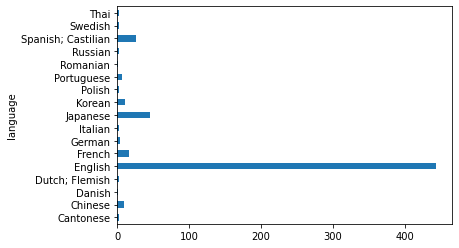

In [13]:
# biểu đồ cột: số lượng phim theo từng ngôn ngữ
data.groupby(["language"]).size().plot(kind="barh")

<AxesSubplot:ylabel='language'>

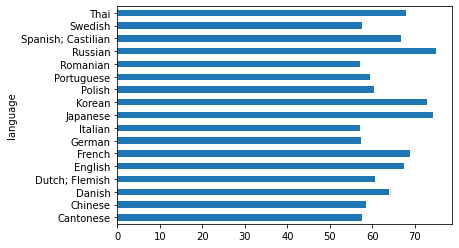

In [15]:
# biểu đồ cột: số điểm trung bình của các bộ phim nhóm theo ngôn ngữ
data.groupby("language")["rating"].mean().plot(kind="barh")
